# Gradient descent on bandwidth parameter (1-dim)

In [1]:
import jax.numpy as np
from jax import grad, jit, vmap, random, jacfwd, jacrev
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

from svgd import SVGD
from metrics import ksd

cpu


/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lib/xla_bridge.py:123: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


## Step one: compute loss

In [2]:
n=100
d=1
stepsize = 0.01
L = 50 # 100 slightly to little, this should be all right
# grid_length = 25
bandwidth = 1

# from utils import log_gaussian_mixture
# logp = lambda x: log_gaussian_mixture(x, means=[-2, 2], variances=[1, 1], weights=[1/3, 2/3])
from jax.scipy.stats import norm

@jit
def logp(x):
    assert x.ndim == 1
    return np.sum(norm.logpdf(x, loc=0, scale=1)) 

svgd_fix = SVGD(logp=logp, n_iter_max=L, adaptive_kernel=False, get_bandwidth=None)

rkey = random.PRNGKey(0)
x0 = random.normal(rkey, shape=(n, d)) + 10

xout, log = svgd_fix.svgd(x0, stepsize, 1, 140)

/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4670: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4670: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lib/xla_bridge.py:123: UserWar

COMPILING


In [4]:
ksd(xout, logp, bandwidth)

DeviceArray(0.02501955, dtype=float32)

In [20]:
def loss(bandwidth):
    xout, log = svgd_fix.svgd(x0, stepsize, bandwidth=bandwidth, n_iter=200)
    return ksd(xout, logp, bandwidth=10)

/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4670: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4670: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


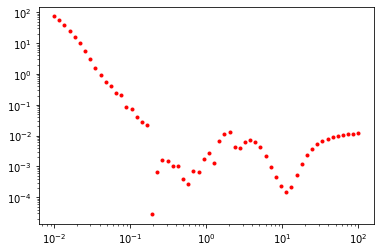

In [21]:
bandwidth_grid = np.logspace(-2, 2, num=60)
plt.plot(bandwidth_grid, [loss(h) for h in bandwidth_grid], "r.")
plt.yscale("log")
plt.xscale("log")

In [22]:
argmin = np.argmin(np.array([loss(h) for h in bandwidth_grid]))
print(argmin)
bandwidth_grid[argmin]

19


DeviceArray(0.19414923, dtype=float32)

### TODOs
* make `fori_loop` differentiable
* track how `bandwidth_grid[argmin]` changes with the bandwidth of KSD

In [9]:
grad(loss)(1.)

COMPILING


Exception: Tracer can't be used with raw numpy functions. You might have
  import numpy as np
instead of
  import jax.numpy as np